<a href="https://colab.research.google.com/github/smr32/GWDissertation/blob/main/Rovito_Dissertation_Code_092624.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade nltk
!pip install --upgrade num2words

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sklearn as sk
import seaborn as sns # data visualization library
import csv
import unicodedata

# New imports below

import nltk
nltk.download('all')
import os
import string
import copy
import pickle
import re
import math

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import Lasso, LassoCV, SGDClassifier, LinearRegression, LogisticRegression, RidgeCV, RidgeClassifierCV, HuberRegressor, LinearRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import RocCurveDisplay, auc

# New imports below

from nltk.corpus import stopwords
# from nltk.corpus import word_tokenize
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from collections import Counter
from num2words import num2words

# Load TQDM to Show Progress Bars

from tqdm import tqdm
from tqdm.notebook import tqdm as tqdm_notebook

# New imports for CART below
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_r

In [ ]:
# Load CSV file and grab different batches
# data = pd.read_csv(r'MatchingTopicsDataset_072423.csv')
# data = pd.read_csv(r'MatchingTopicsDataset_073123_PhaseIIOnly.csv')
# data = pd.read_csv(r'MatchingTopicsDataset_073123_PhaseIIOnly_AFRemoved.csv')
# data = pd.read_csv(r'SBIR Navy PhaseII Data_081223_NARemoved_Abstracts_Revenue.csv')
# data = pd.read_csv(r'SBIR Navy PhaseII Data_090423.csv')
# data = pd.read_csv(r'SBIR Navy PhaseII Data_090423_NARemoved.csv')
# data = pd.read_csv(r'SBIR Navy PhaseII Data_090423_NARemoved_Success.csv')
# data = pd.read_csv(r'SBIR Navy PhaseII Data_090423_NARemoved_Updated.csv')
data = pd.read_csv(r'SBIR Navy PhaseII Data_090423_NARemoved_Updated_NavyOnly.csv')
data.head()

,Company,Company Simple,Award Title,Agency,Branch,Phase,Program,Agency Tracking Number,Agency Tracking Number Simple,Contract,...,PitchBook,Income Year,Annual Revenue,Other Number Employees,Year Founded,RAW Firm Age at Award,Firm Age at Award,Patents,Patenting Activity,NOTES
0,"3 Phoenix, Inc.",3 Phoenix Inc,Adding Communications Mode Capability in the P...,Department of Defense,Navy,Phase II,SBIR,N121-076-0183,N121-076-0183,N00024-14-C-4000,...,"31,900,000",2011.0,37625450,182.0,2004,10,10,1.0,1,Acquired by Ultra Electronics for $70 million ...
1,"3 Phoenix, Inc.",3 Phoenix Inc,Techniques for Automatically Exploiting Passiv...,Department of Defense,Navy,Phase II,SBIR,N062-138-0499,N062-138-0499,N00024-09-C-4146,...,"31,900,000",2011.0,37625450,182.0,2004,5,5,1.0,1,Acquired by Ultra Electronics for $70 million ...
2,"3 Phoenix, Inc.",3 Phoenix Inc,Techniques for Automatically Exploiting Passiv...,Department of Defense,Navy,Phase II,SBIR,N062-138-0499,N062-138-0499,N00024-10-C-4152,...,"31,900,000",2011.0,37625450,182.0,2004,6,6,1.0,1,Acquired by Ultra Electronics for $70 million ...
3,"3 Phoenix, Inc.",3 Phoenix Inc,Techniques for Automatically Exploiting Passiv...,Department of Defense,Navy,Phase II,SBIR,N062-138-0499a,N062-138-0499,N00024-10-C-4152,...,"31,900,000",2011.0,37625450,182.0,2004,6,6,1.0,1,Acquired by Ultra Electronics for $70 million ...
4,"3 Phoenix, Inc.",3 Phoenix Inc,Distributed Sensor System Innovations,Department of Defense,Navy,Phase II,SBIR,N071-070-0287,N071-070-0287,N00014-08-C-0657,...,"31,900,000",2011.0,37625450,182.0,2004,4,4,1.0,1,Acquired by Ultra Electronics for $70 million ...


In [ ]:
# Get data columns
data.columns

Index(['Company', 'Company Simple', 'Award Title', 'Agency', 'Branch', 'Phase',
       'Program', 'Agency Tracking Number', 'Agency Tracking Number Simple',
       'Contract', 'Contract Simple', 'Proposal Award Date',
       'Contract End Date', 'Solicitation Number', 'Solicitation Year',
       'Topic Code', 'Award Year', 'Award Amount', 'DUNS', 'HUBZone Owned',
       'Socially and Economically Disadvantaged', 'Women Owned',
       'Number Employees', 'Number SBIR Phase I Awards',
       'Number SBIR Phase II Awards', 'Number SBIR Awards Total',
       'Year First SBIR Phase I Award', 'Year First SBIR Phase II Award',
       'Delta Phase I and II', 'Total SBIR Investment', 'SBIR Phase III',
       'Company Website', 'Address1', 'Address2', 'City', 'State', 'Zip',
       'State Matching Funds', 'Abstract', 'Contact Name', 'Contact Title',
       'Contact Phone', 'Contact Email', 'PI Name', 'PI Title',
       'PI Education Level', 'PI Phone', 'PI Email', 'RI Name', 'RI POC Name',
     

In [ ]:
# Remove non-ASCII characters
# Create a new dataframe to store the cleaned data
cleaned_data = pd.DataFrame(columns = data.columns)

# Iterate through each row in the original dataframe
for i, row in data.iterrows():
  # Iterate through each column in the row
  for col in data.columns:
    # Remove non-ASCII characters from the cell value
    cleaned_value = ''.join([char for char in str(row[col]) if ord(char) < 128])
    # Add the cleaned cell value to the cleaned dataframe
    cleaned_data.at[i, col] = cleaned_value
print(cleaned_data)

                      Company            Company Simple  \
0             3 Phoenix, Inc.             3 Phoenix Inc   
1             3 Phoenix, Inc.             3 Phoenix Inc   
2             3 Phoenix, Inc.             3 Phoenix Inc   
3             3 Phoenix, Inc.             3 Phoenix Inc   
4             3 Phoenix, Inc.             3 Phoenix Inc   
..                        ...                       ...   
690   Wilcoxon Research, Inc.     Wilcoxon Research Inc   
691         WILLIAMSRDM, INC.           WILLIAMSRDM INC   
692              Wintec, Inc.                Wintec Inc   
693  SCIENTIFIC SOLUTIONS INC  SCIENTIFIC SOLUTIONS INC   
694              VOXTEL, INC.                VOXTEL INC   

                                           Award Title                 Agency  \
0    Adding Communications Mode Capability in the P...  Department of Defense   
1    Techniques for Automatically Exploiting Passiv...  Department of Defense   
2    Techniques for Automatically Exploiting Pas

In [ ]:
df = cleaned_data
df = df.dropna()

Initial machine learning model analysis (with k-fold cross validation)

In [ ]:
# Set independent and dependent variables here
# Comment/uncomment the desired combination below

import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

# FIRST COLUMN - SBIR PHASE III AWARD
X = df[['Award Year', 'Award Amount', 'HUBZone Owned',
       'Socially and Economically Disadvantaged', 'Women Owned',
       'Number Employees', 'Annual Revenue', 'Patenting Activity',
       'Masters Degree', 'Doctoral Degree', 'Non-Navy SBIR Awards',
       'Non-DoD SBIR Awards', 'STTR Awards', 'VC', 'Firm Age at Award',
       'Number SBIR Phase I Awards', 'Number SBIR Phase II Awards', 'Total SBIR Investment']]
y = df['SBIR Phase III']

# SECOND COLUMN - SBIR PHASE III AWARD
# X = df[['Award Amount', 'Number Employees', 'Annual Revenue', 'VC', 'Firm Age at Award',
#       'Number SBIR Phase I Awards', 'Number SBIR Phase II Awards', 'Total SBIR Investment']]
# y = df['SBIR Phase III']

# THIRD COLUMN - SBIR PHASE III AWARD
# X = df[['Award Amount', 'Annual Revenue', 'Award Year']]
# y = df['SBIR Phase III']

# FOURTH COLUMN - SBIR PHASE III AWARD
# X = df[['Award Amount', 'Annual Revenue', 'Total SBIR Investment']]
# y = df['SBIR Phase III']

# FIFTH COLUMN - SBIR PHASE III AWARD
# X = df[['Annual Revenue', 'Number SBIR Phase I Awards', 'Number SBIR Phase II Awards']]
# y = df['SBIR Phase III']

# FIRST COLUMN - SBIR SUCCESS
# X = df[['Award Year', 'Award Amount', 'HUBZone Owned',
#        'Socially and Economically Disadvantaged', 'Women Owned',
#        'Number Employees', 'Annual Revenue', 'Patenting Activity',
#       'Masters Degree', 'Doctoral Degree', 'Non-Navy SBIR Awards',
#       'Non-DoD SBIR Awards', 'STTR Awards', 'VC', 'Firm Age at Award',
#       'Number SBIR Phase I Awards', 'Number SBIR Phase II Awards', 'Total SBIR Investment']]
# y = df['SBIR Success']

# SECOND COLUMN - SBIR SUCCESS
# X = df[['Award Amount', 'Number Employees', 'Annual Revenue', 'VC', 'Firm Age at Award',
#       'Number SBIR Phase I Awards', 'Number SBIR Phase II Awards', 'Total SBIR Investment']]
# y = df['SBIR Success']

# THIRD COLUMN - SBIR SUCCESS
# X = df[['Award Amount', 'Annual Revenue', 'Award Year']]
# y = df['SBIR Success']

# FOURTH COLUMN - SBIR SUCCESS
# X = df[['Award Amount', 'Annual Revenue', 'Total SBIR Investment']]
# y = df['SBIR Success']

# FIFTH COLUMN - SBIR SUCCESS
# X = df[['Annual Revenue', 'Number SBIR Phase I Awards', 'Number SBIR Phase II Awards']]
# y = df['SBIR Success']

In [ ]:
# Logistic Regression model
model = LogisticRegression(random_state = 42)

In [ ]:
# Naive Bayes Classifier model
model = MultinomialNB()

In [ ]:
# Decision Tree Classifier model
model = DecisionTreeClassifier(random_state = 42)

In [ ]:
# Random Forest Classifier model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state = 42)

In [ ]:
# Define number of splits
k = 10

In [ ]:
# Create KFold object
kfold = KFold(n_splits = k, shuffle = True, random_state = 42)

In [ ]:
# Run model and make predictions
predicted_probs = cross_val_predict(model, X, y, cv = kfold, method = 'predict_proba')

In [ ]:
# Calculate mean accuracy and standard deviation
results = cross_val_score(model, X, y, cv = kfold, scoring = 'accuracy')
print("Mean accuracy: %.2f%%" % (results.mean() * 100))
print("Standard deviation: %.2f%%" % (results.std() * 100))

Mean accuracy: 71.67%
Standard deviation: 5.27%


In [ ]:
# Calculate ROC AUC score
roc_auc = roc_auc_score(y, predicted_probs[:, 1])
print("ROC AUC score: ", roc_auc)

ROC AUC score:  0.3771940554094551


SHAP value analysis

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

!pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 1.8 MB/s eta 0:00:00


In [ ]:
# Implement MLP
# Split data into train and test sets
# Originally had test_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the neural network model
model = MLPClassifier(hidden_layer_sizes=(30, 30), max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
print(np.trace(conf_matrix)/np.sum(conf_matrix))

Confusion Matrix:
[[140   1]
 [ 68   0]]
0.6698564593301436


Text(50.722222222222214, 0.5, 'True Labels')

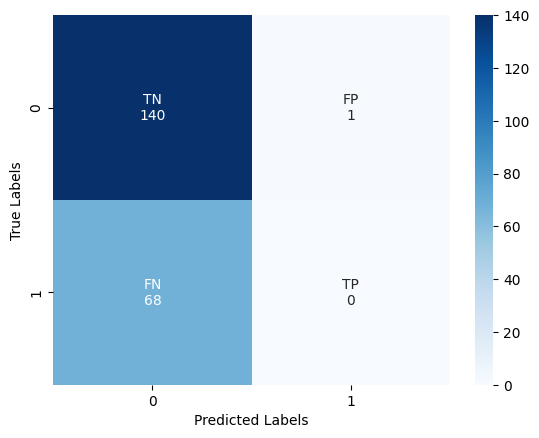

In [ ]:
# Calculate a colorful confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
cnf_matrix = confusion_matrix(y_test, y_pred)
group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in cnf_matrix.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cnf_matrix, annot=labels, fmt='', cmap='Blues');
# Add labels to the axes
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

In [ ]:
# Additional SHAP code, if deemed to be of interest
import shap
explainer = shap.Explainer(model.predict, X_train)
shap_values = explainer(X_test)
shap.plots.beeswarm(shap_values)
shap.plots.bar(shap_values)

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''